In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Train data

In [3]:
train = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_train_data_PCA', sep=',')

In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(train.values)

KMeans(n_clusters=3, random_state=0)

In [5]:
kmeans.cluster_centers_

array([[-1.15642535e-02, -2.10073273e-01,  3.71502540e-02,
        -4.75778336e-04, -2.25083220e-03,  2.08797406e-04,
         4.48517644e-04,  8.41898548e-05,  1.12277800e-04,
        -2.24000704e-06],
       [ 1.52868008e-01,  4.23590499e+00, -7.49380641e-01,
         2.02105403e-02,  4.55172145e-02, -4.21426060e-03,
        -9.03775123e-03, -1.69386536e-03, -1.73016923e-03,
         4.50398015e-05],
       [ 3.23075575e+02, -2.91986376e+00,  1.66392314e+00,
        -4.27368728e+01, -5.60807907e-01,  1.93315262e-02,
        -1.84449689e-02, -1.38575549e-02, -2.14680495e+00,
         4.82286683e-04]])

In [6]:
predict = kmeans.predict(train)

In [7]:
predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
train['cluster'] = predict
train['cluster'].value_counts()

In [11]:
cluster2 = train.loc[train['cluster'] == 2]

In [12]:
cluster2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
42330,296.487717,-0.959005,-0.909124,-138.118560,-0.821304,-0.027890,0.027867,-0.574712,27.706370,0.003724,2
77793,164.045040,2.622254,0.100128,-77.892472,-0.645430,0.005163,0.002575,-0.255301,10.929448,-0.002101,2
348964,444.411187,-4.954078,0.187397,-204.775201,-1.643990,-0.074939,0.009878,-0.967865,45.153573,0.012412,2
524311,255.555510,-0.874872,-1.038245,-126.570828,-0.738355,-0.017026,-0.032184,0.326587,-8.097330,-0.012487,2
614948,289.234453,0.087604,-1.163188,-133.685342,-0.720499,-0.019426,0.049156,-0.773710,35.312897,0.006376,2


In [15]:
cluster0_sample = train.loc[train['cluster'] == 0].sample(frac =.01)
cluster1_sample = train.loc[train['cluster'] == 1].sample(frac =.01)

In [16]:
sample = pd.concat([cluster2,cluster1_sample,cluster0_sample])
sample['cluster'].value_counts()

0    132258
1      6560
2       163
Name: cluster, dtype: int64

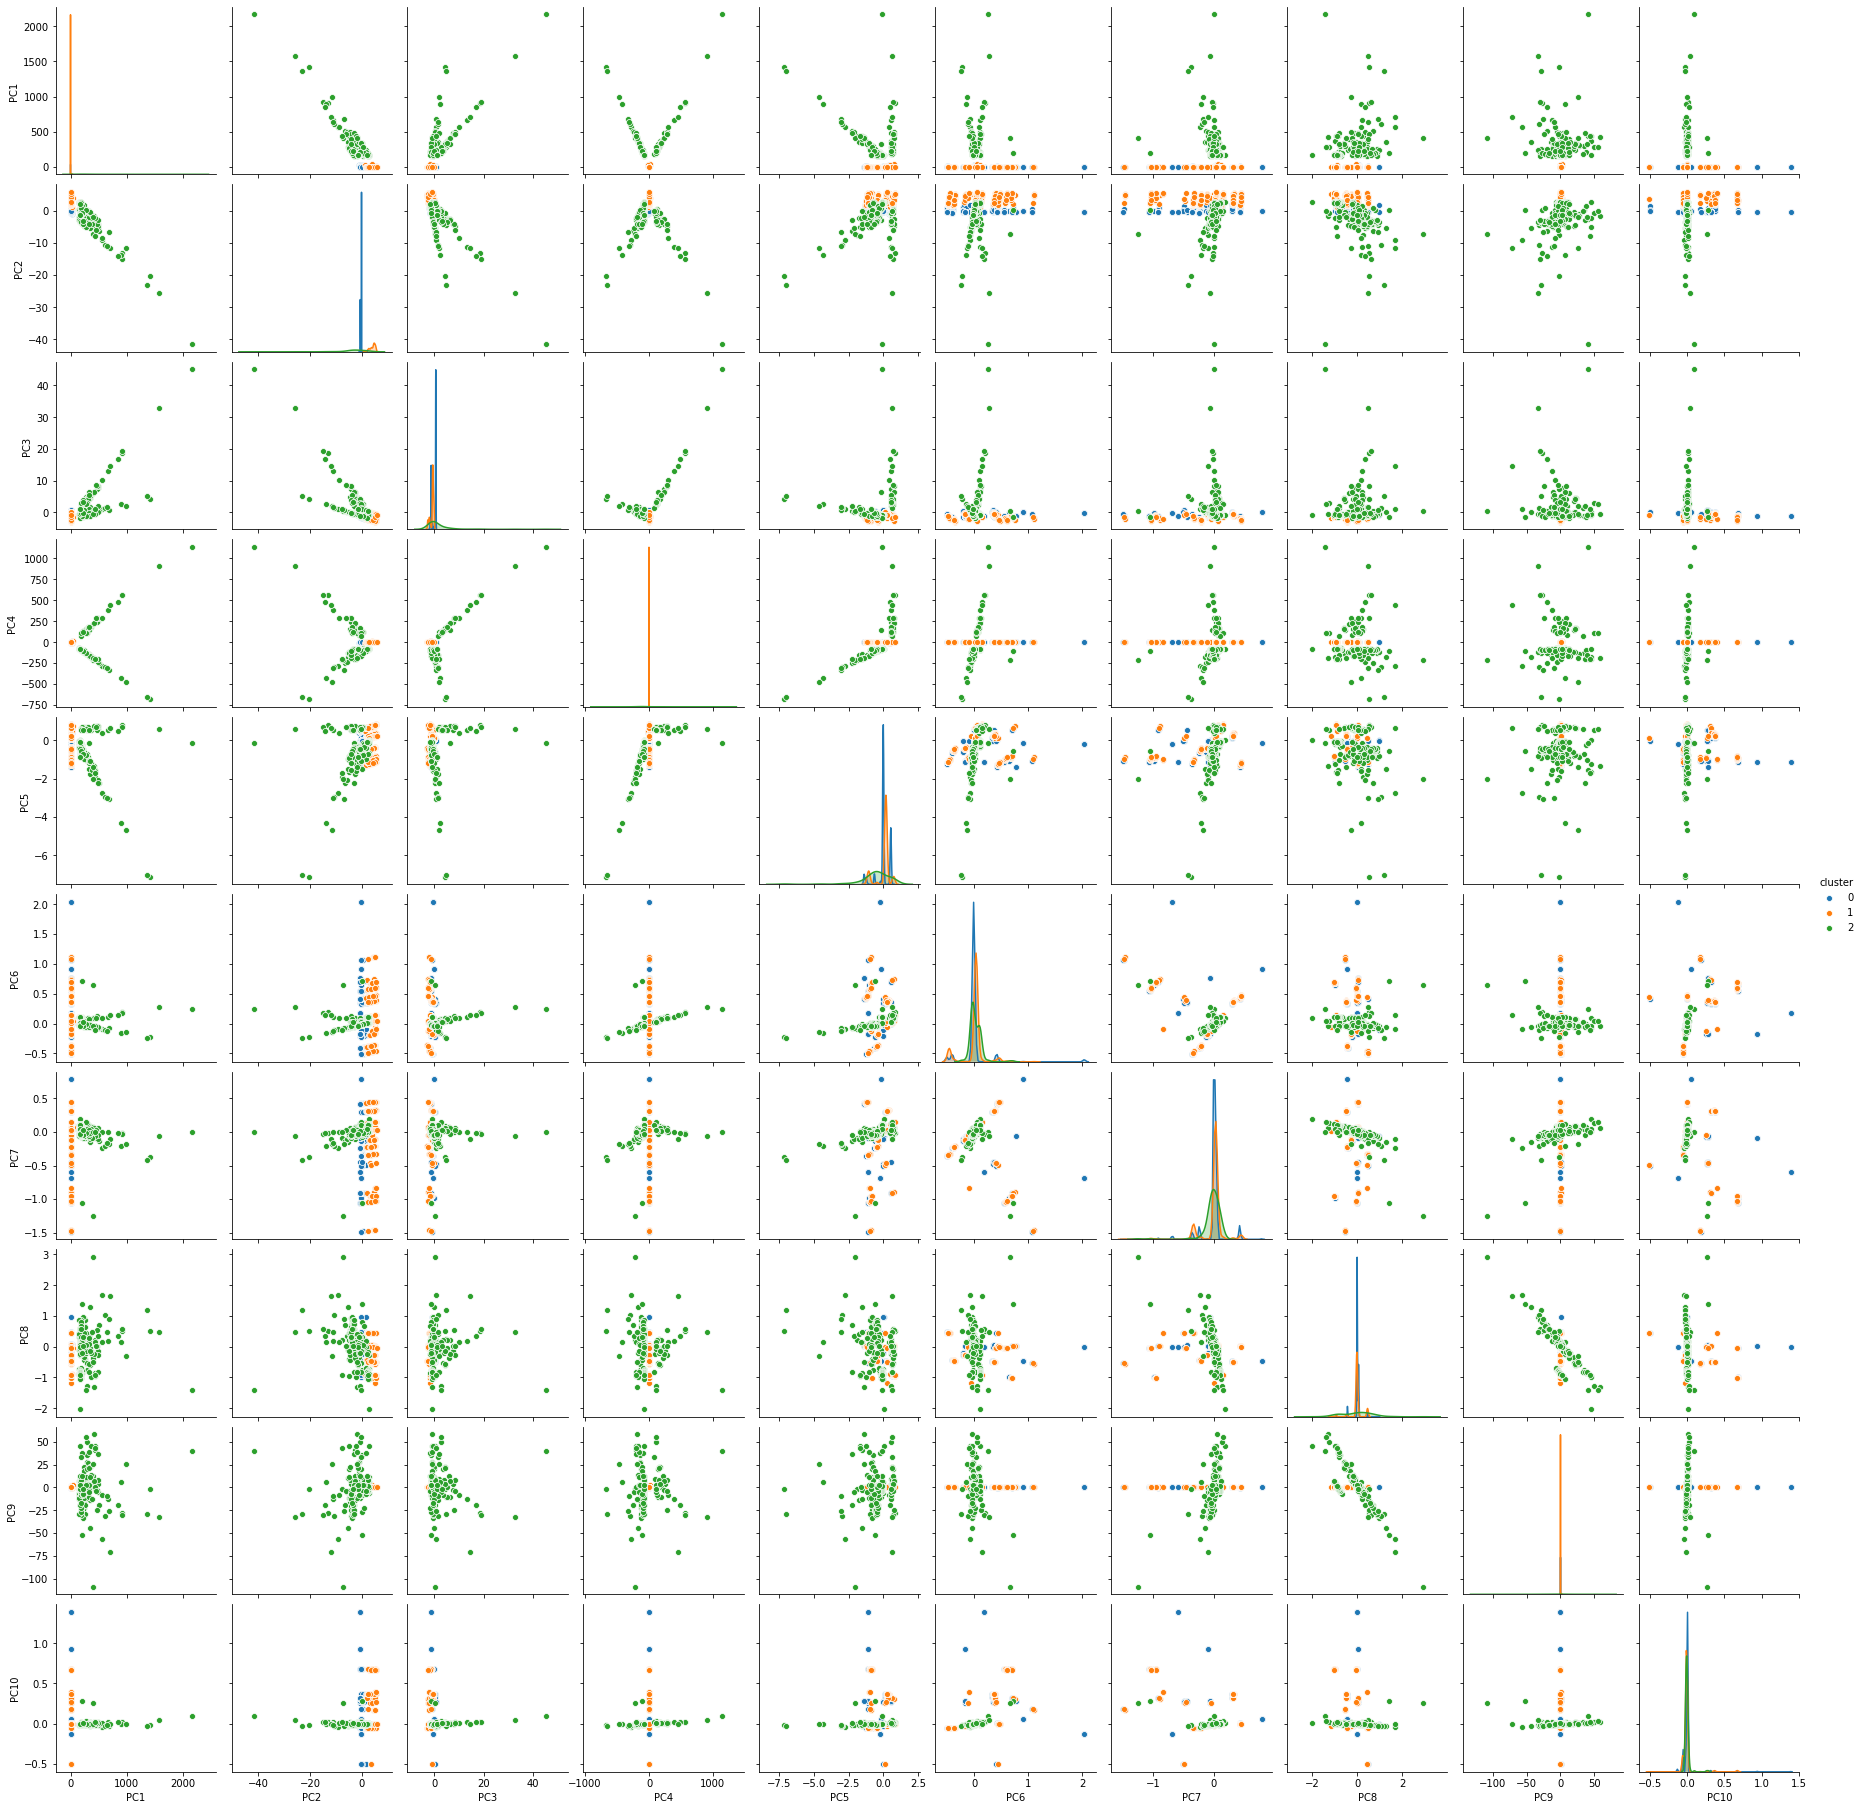

In [17]:
sns.pairplot(sample, hue = 'cluster')

In [18]:
cluster2.to_csv('predictions/A1_train_Kmean_PCA.csv', sep=',')

In [24]:
original_train = pd.read_csv('../ml-data/cyberattack_detection/1_raw_data/A2_1/training_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

train_anomalies = original_train[original_train.index.isin(cluster2.index)]

In [25]:
train_anomalies.head()

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
42330,2012/12/01 13:19:23.079263,2913.796423,tcp,131.179.92.105,42508,->,234.223.87.6,80,FSPA_FSPA,0.0,0.0,957569,812709490,24672269
77793,2012/12/01 13:27:40.701357,3487.617736,udp,144.105.93.187,35155,<->,154.127.109.154,64131,CON,0.0,0.0,519406,463226951,11645336
348964,2012/12/01 14:05:52.634943,1934.330010,tcp,169.105.93.27,36891,->,204.40.157.103,25443,FSRPA_FSPA,0.0,0.0,1442700,1205710921,40246207
524311,2012/12/01 14:42:22.980022,2572.039060,tcp,175.158.88.184,1627,->,191.173.200.176,80,SRPA_FSPA,0.0,0.0,746503,795738712,11591580
614948,2012/12/01 15:03:57.667980,3493.885969,tcp,131.179.92.105,47454,->,234.223.87.6,80,FSPA_FSPA,0.0,0.0,955604,769291578,25232415


In [34]:
train_anomalies.to_csv('predictions/A1_train_Kmean_PCA_anomalies.csv', sep=',')

### Test data

In [27]:
test = pd.read_csv('../ml-data/cyberattack_detection/3_selected_features/A1_test_data_PCA', sep=',')

In [28]:
test_predict = kmeans.predict(test)

In [30]:
test['cluster'] = test_predict
test['cluster'].value_counts()

0    1048144
1       5694
2          7
Name: cluster, dtype: int64

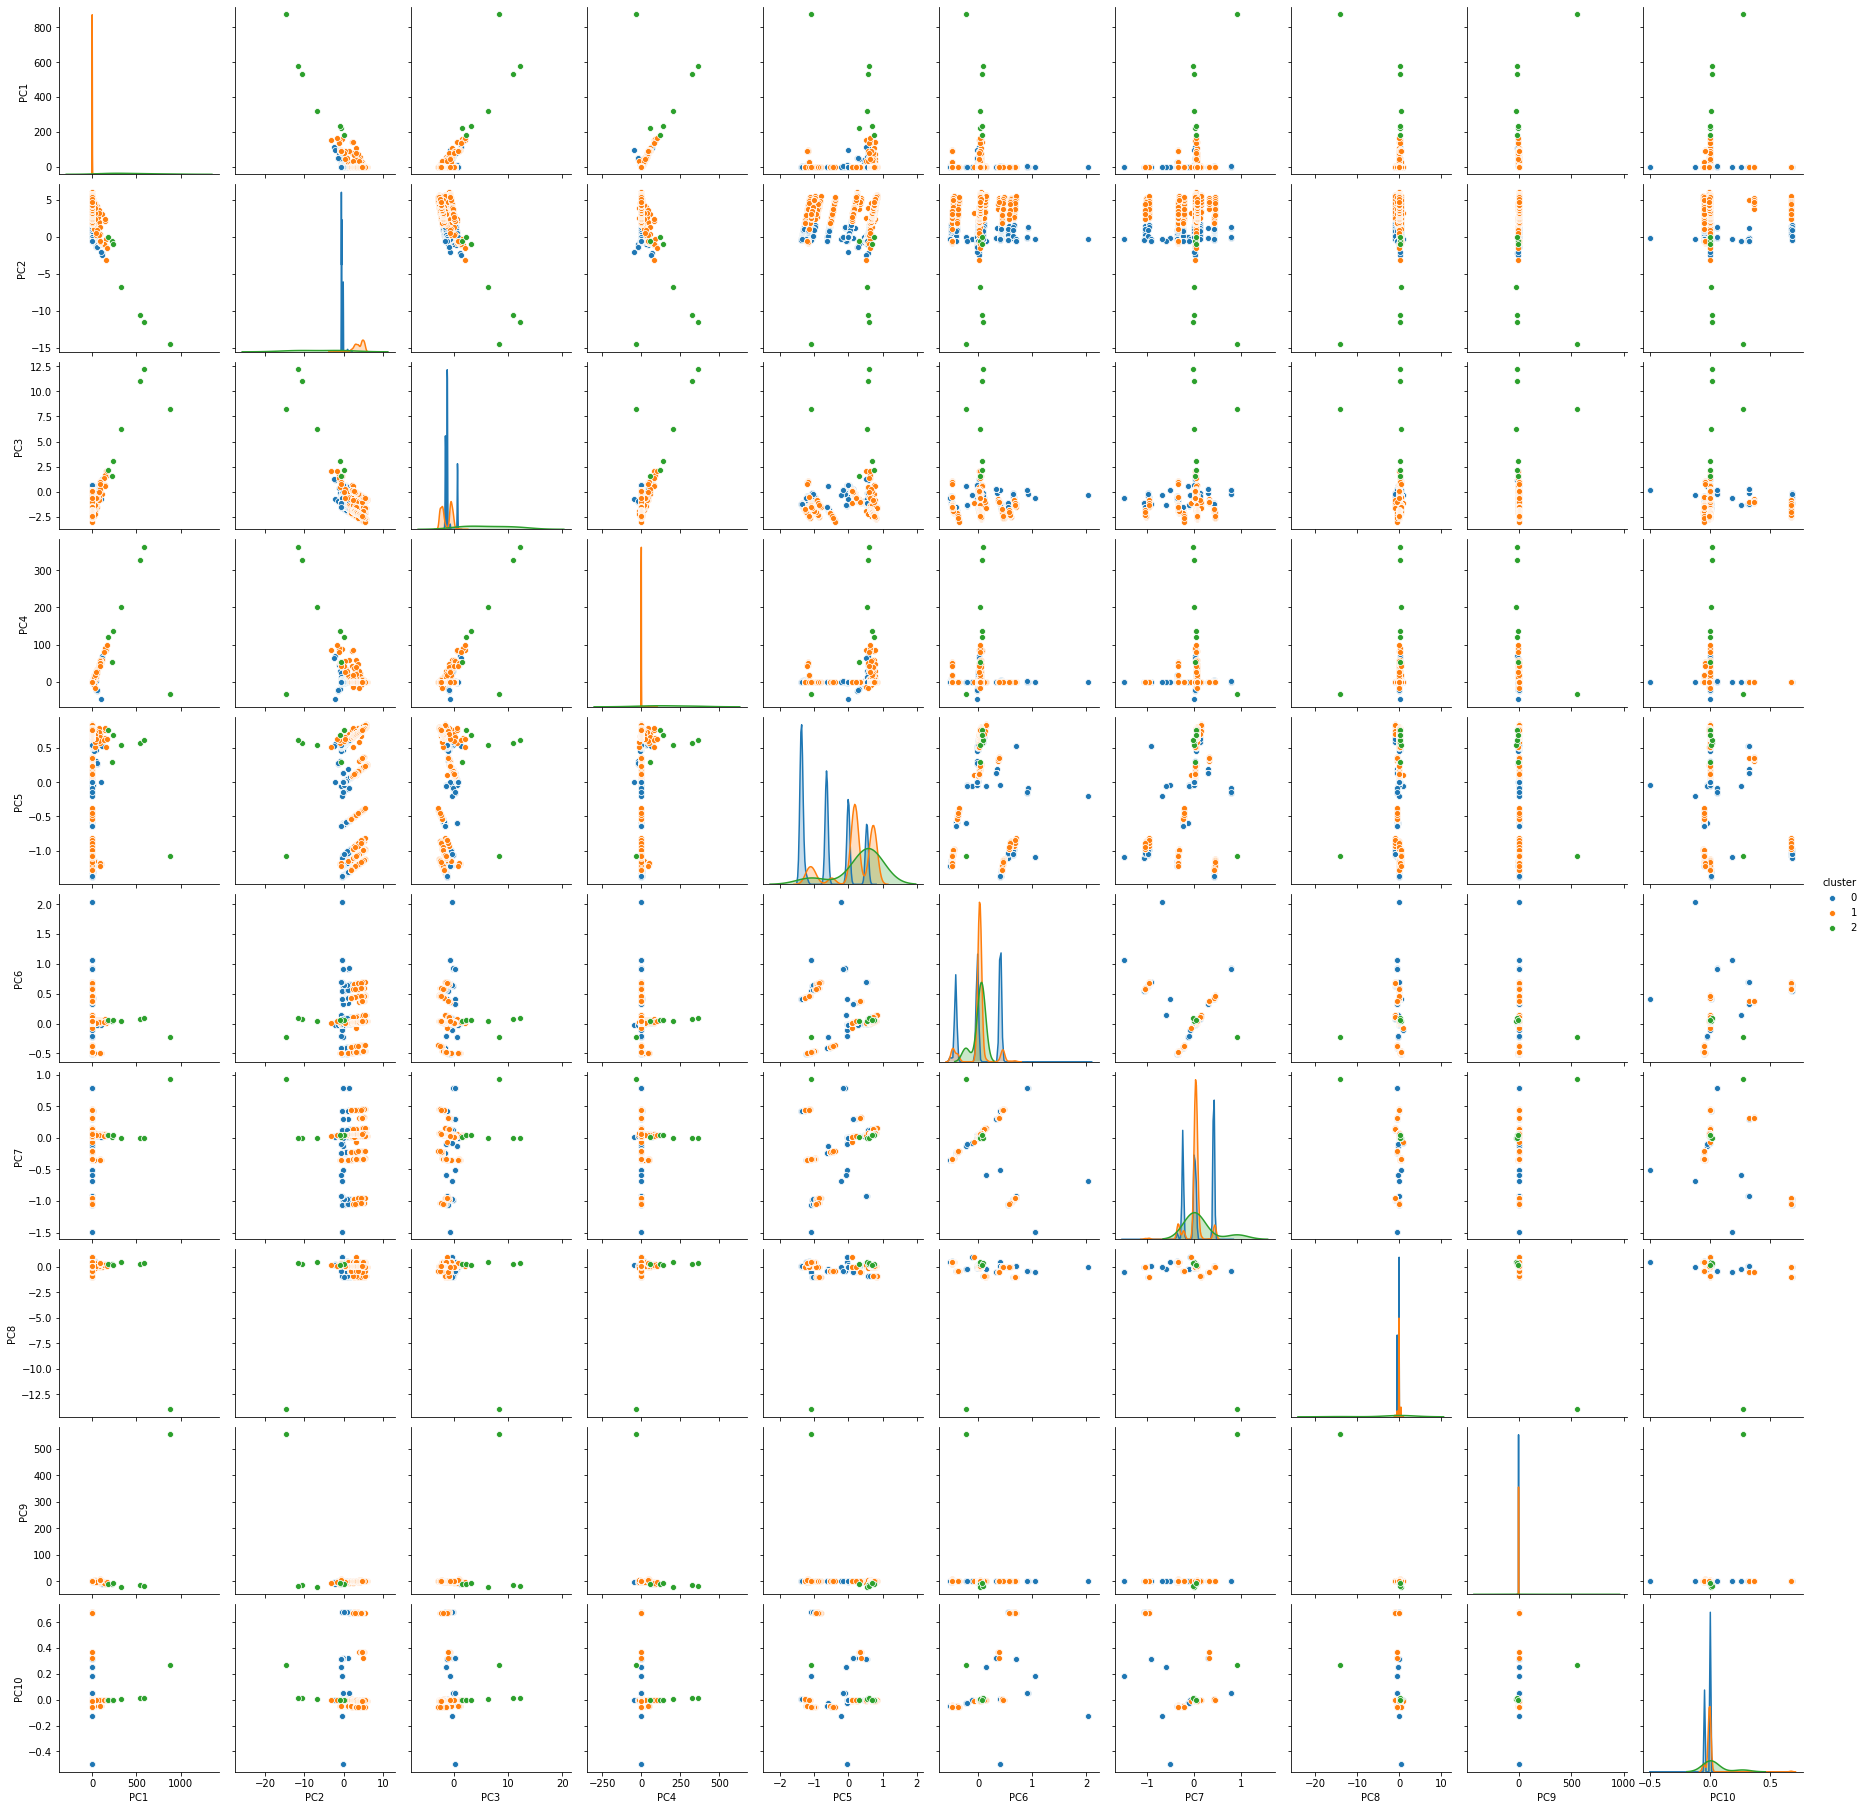

In [31]:
sns.pairplot(test, hue = 'cluster')

In [32]:
cluster2_test = test.loc[test['cluster'] == 2]

In [33]:
cluster2_test.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
25791,221.376790,-0.570495,1.527266,53.733549,0.296434,0.040544,0.016703,0.252710,-8.956023,-0.004818,2
413007,183.634318,-0.011632,2.170887,120.959281,0.755906,0.063344,0.037264,0.254095,-10.476846,-0.002843,2
418315,534.260843,-10.601365,10.998131,327.494247,0.574307,0.075390,-0.004357,0.292939,-14.816053,0.013881,2
419585,320.091128,-6.801457,6.253919,200.137824,0.546979,0.043252,-0.007459,0.482586,-20.163018,0.002908,2
585475,874.594180,-14.533637,8.273122,-33.958135,-1.081439,-0.226809,0.923350,-13.947715,555.072933,0.269376,2
585542,580.845569,-11.545609,12.188478,362.909801,0.607106,0.085099,-0.010008,0.351885,-17.748993,0.014811,2
794643,236.467412,-0.986818,3.101829,137.138929,0.684943,0.065268,0.037455,0.168589,-7.308390,0.000095,2


In [35]:
cluster2_test.to_csv('predictions/A1_test_Kmean_PCA.csv', sep=',')

In [37]:
original_test = pd.read_csv('../ml-data/cyberattack_detection/1_raw_data/A2_1/test_data', sep=','
                       ,names=['Timestamp','Duration','Protocol','SrcIPAddress','SrcPort','Direction',
                               'DestIPAddress','DestPort','State','SrcTypeService','DestTypeService',
                               'TotalPackets','TotalBytes','SourceBytes'])

test_anomalies = original_test[original_test.index.isin(cluster2_test.index)]

In [39]:
test_anomalies.head(10)

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes
25791,2012/12/01 16:19:52.501785,2654.684789,tcp,224.134.91.164,48234,->,230.53.182.2,40851,SPA_SRPA,0.0,0.0,446925,477949138,250296868
413007,2012/12/04 21:43:24.759487,2683.513175,tcp,224.134.91.164,59279,->,158.118.17.39,64556,FSPA_FSPA,0.0,0.0,271454,303327122,320034654
418315,2012/12/05 01:01:34.411287,290.254589,tcp,224.134.91.164,37310,->,154.195.93.62,45846,FSPA_FSPA,0.0,0.0,862161,873611545,894860724
419585,2012/12/05 01:34:01.255451,56.155544,tcp,224.134.91.164,45532,->,220.50.118.9,21006,SPA_FSRPA,0.0,0.0,480905,548319086,542395810
585475,2012/12/06 01:46:13.253117,196.826747,tcp,224.134.91.164,38956,->,167.44.122.77,11671,FSPA_FSPA,0.0,0.0,3680561,640979224,601692829
585542,2012/12/06 01:49:49.051082,284.706998,tcp,224.134.91.164,55201,->,176.221.130.153,2727,FSPA_FSPA,0.0,0.0,924666,945069474,983047134
794643,2012/12/08 00:43:05.397400,2690.217859,tcp,224.134.91.164,34001,->,181.198.18.6,29744,FSPA_FSPA,0.0,0.0,388717,398839508,384503396


In [40]:
test_anomalies.to_csv('predictions/A1_test_Kmean_PCA_anomalies.csv', sep=',')